In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import pandas as pd
from skimage.io import imread

image = imread('parrots.jpg')

In [70]:
from skimage import img_as_float
image = img_as_float(image)

Создайте матрицу объекты-признаки: характеризуйте каждый пиксель тремя координатами - значениями интенсивности в пространстве RGB.

In [71]:
x, y, z = image.shape
COLORS = ['Red', 'Green', 'Blue']
data = pd.DataFrame(image.reshape((x*y, z)), columns=COLORS)

Запустите алгоритм K-Means с параметрами init='k-means++' и random_state=241. После выделения кластеров все пиксели, отнесенные в один кластер, попробуйте заполнить двумя способами: медианным и средним цветом по кластеру.

In [72]:
def get_rgb(label, func):
    result = []
    for color in COLORS:
        result.append(func(data[color][data['label'] == label]))
    return result

In [73]:
def recreate_image(labels_colors, data):
    image = np.zeros((x, y, z))
    label_idx = 0
    for i in range(x):
        for j in range(y):
            image[i][j] = labels_colors[data['label'][label_idx]]
            label_idx += 1
    return image

In [74]:
from sklearn.cluster import KMeans

def clusterize_image(data, n_clusters, average_function):
    cls = KMeans(n_clusters=n_clusters, init='k-means++', random_state=241)
    cls.fit(data)
    data['label'] = cls.predict(data)
    labels_colors = [get_rgb(i, average_function) for i in xrange(n_clusters)]
    return recreate_image(labels_colors, data)

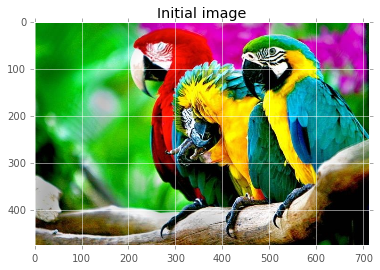

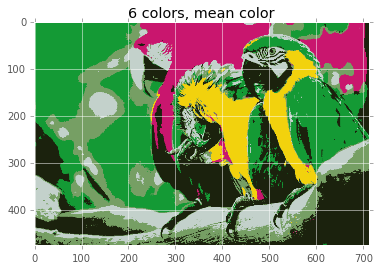

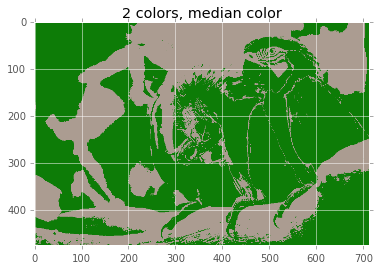

In [77]:
def show_image(title, image):
    plt.title(title)
    plt.imshow(image)
    plt.show()
    
show_image("Initial image", image)
show_image("6 colors, mean color", clusterize_image(data, 6, np.mean))
show_image("2 colors, median color", clusterize_image(data, 2, np.median))

Измерьте качество получившейся сегментации с помощью метрики PSNR. Эту метрику нужно реализовать самостоятельно.

In [78]:
image_mean = clusterize_image(data, 8, np.mean)

In [97]:
def MSE(im1, im2):
    x, y, z = im1.shape
    return ((im1 - im2)**2).sum()/(x*y*z)

def PSNR(im1, im2):
    return 20*log10(1) - 10*log10(MSE(im1, im2))

print PSNR(image, image_mean)

18.2622929434


Найдите минимальное количество кластеров, при котором значение PSNR выше 20 (можно рассмотреть не более 20 кластеров). Это число и будет ответом в данной задаче.

In [91]:
psnrs = []
n_clusters = range(8, 21)
for n in n_clusters:
    psnrs.append(PSNR(image, clusterize_image(data, n, np.mean)))

12


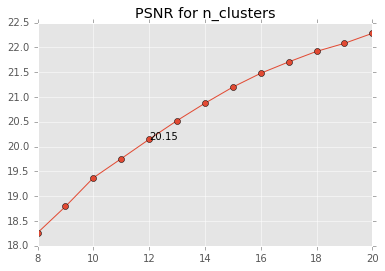

In [94]:
plt.title('PSNR for n_clusters')
plt.plot(n_clusters, psnrs, '-o')
for i in xrange(len(n_clusters)):
    if psnrs[i] > 20:
        plt.annotate("{0:.2f}".format(psnrs[i]), (n_clusters[i], psnrs[i]))
        print n_clusters[i]
        break
plt.show()

In [98]:
with open("submissions/6_1.txt", "w") as f:
    f.write("12")